<a href="https://colab.research.google.com/github/kristina-arezina/Text-Classification-using-Logistic-Regression/blob/main/Text_Classification_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

# Data

For this example you need to download twitter data from Kaggle: https://www.kaggle.com/kazanova/sentiment140

**Context**

This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment.

**Content**

It contains the following 6 fields:

target: the polarity of the tweet (0 = negative, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)

In [3]:
df = pd.read_csv('twitter-sa.csv',
                 encoding='ISO-8859-1', 
                 names=[
                        'target',
                        'id',
                        'date',
                        'flag',
                        'user',
                        'text'
                        ])

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# We have two classes in the dataset
df.target.unique()

array([0, 4])

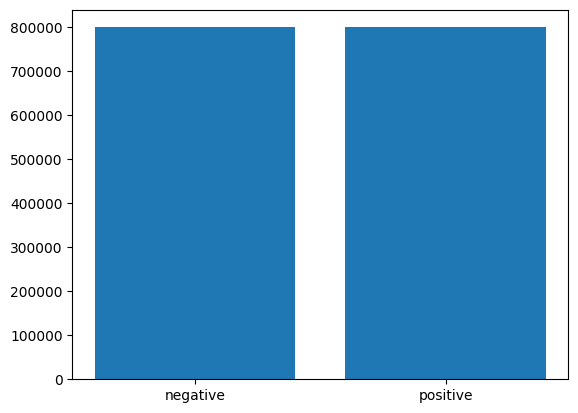

In [6]:
# Check how equally distributed those classes are.
classes = df.target.unique()
counts = []

for i in classes:
  count = len(df[df.target==i])
  counts.append(count)

plt.bar(['negative', 'positive'], counts)
plt.show()

Even class distribution helps us a lot in text classifiction. Imagine a situation where 95% of data is in one class and the rest 5% is split among other 5 classes. If we wouldn't do anything about it model would just learn to guess the 95% class all the time and would be correct 95% of the time on the data we would use.

# Vectorize

What we need to do now is to split the data into training and testing datasets and vectorize (essentialy turning text into number vectors) the text.

In [7]:
x = df.text.values
y = df.target.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

Vectorizing

In [8]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

Our vectorized dataset will consist of index of each word that is used in training dataset. We can check how it looks by simply printing the first tweet both as it was and after vectorizing it.

In [9]:
print(x_train[0], '\n', X_train[0])

It was rainy and cloudy in the Windy City today &amp; WF customers had some serious SAD issues! I'm with them, when is summer coming?  
 <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 24 stored elements and shape (1, 589114)>
  Coords	Values
  (0, 56126)	1
  (0, 57443)	1
  (0, 126950)	1
  (0, 129399)	1
  (0, 132544)	1
  (0, 142868)	1
  (0, 226851)	1
  (0, 251981)	1
  (0, 256885)	1
  (0, 257700)	1
  (0, 257841)	1
  (0, 433424)	1
  (0, 455284)	1
  (0, 467402)	1
  (0, 486023)	1
  (0, 501487)	1
  (0, 517082)	1
  (0, 519964)	1
  (0, 528707)	1
  (0, 558260)	1
  (0, 561897)	1
  (0, 562752)	1
  (0, 565913)	1
  (0, 566694)	1


Now the sparse matrix you see corresponds to index of the word and count of it in the tweet. Keep in mind it's not in the same order as in the tweet. You can check the corresponding values using vocabulary of the vectorizer.

In [10]:
import re

# delimiters https://stackoverflow.com/questions/35221535/python-removing-delimiters-from-strings
d = ",.!?/&-:;@'..."
"["+"\\".join(d)+"]"

# clean up the string
s = x_train[0]
s = ' '.join(w for w in re.split("["+"\\".join(d)+"]", s) if w)

for i in s.split():
  if len(i)>1: print(i, vectorizer.vocabulary_[i.lower()])

It 257841
was 558260
rainy 433424
and 57443
cloudy 129399
in 251981
the 517082
Windy 565913
City 126950
today 528707
amp 56126
WF 561897
customers 142868
had 226851
some 486023
serious 467402
SAD 455284
issues 257700
with 566694
them 519964
when 562752
is 256885
summer 501487
coming 132544


# Modelling
The model that we use here is a simple [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression). \\
It's the simpliest model (to my knowledge) to start with text classification and use it's accuracy as a base measure.

In [11]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8002875


/Users/user/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


So we got an 80% accuracy measure which is great considering we only used like 5mins of our time to make this.

#Confussion matrix
Before jumping into other models it's always good to check how our model performs in different classes. For that we can use [confussion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

It essentially shows how many times model predicted which class and how many of those times the class it slected was the right one. Here columns are true values and lines are predicted values.

In [12]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=df.target.unique())
df_cm = pd.DataFrame(cm, index=df.target.unique(), columns=df.target.unique())
df_cm

,0,4
0,126491,33830
4,30078,129601


For a better understanding you could use percentage expression.

In [13]:
df_cm_percentage = df_cm.copy()
for i in df_cm_percentage:
  df_cm_percentage[i]/=df_cm_percentage[i].sum()

df_cm_percentage

,0,4
0,0.807893,0.206999
4,0.192107,0.793001


# Test

Now we need to check if it actually works. 

The comment is: We all struggle, even the people you don’t think... so here’s me opening up a little.

In [14]:
tweet = 'Life is a journey, enjoy it.'
vectTweet = vectorizer.transform(np.array([tweet]))  # vectorizes the tweet using our vectorizer

prediction = classifier.predict(vectTweet)  # predicts class of the tweet
print('Tweet is', 'positive' if prediction[0]==4 else 'negative')

Tweet is positive


Good, so our model is right here. Let's just make sure our model works okay with very specific sentiments.

In [15]:
tweetList = ['Best tweet ever!', 'Mondays are the worst...']
vectTweet = vectorizer.transform(np.array(tweetList))  # vectorizes the tweet using our vectorizer

prediction = classifier.predict(vectTweet)  # predicts class of the tweet
for enum, i in enumerate(tweetList):
  print(i, '| This tweet is', 'positive' if prediction[enum]==4 else 'negative')

Best tweet ever! | This tweet is positive
Mondays are the worst... | This tweet is negative
